![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Earl Chirchir
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [34]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
# Here you run your code to explore the data

gross_revenues_df = pd.read_csv('zippedData/bom.movie_gross.csv')
movies_basic_info_df = pd.read_csv('zippedData/title.basics.csv')
movies_ratings_df = pd.read_csv('zippedData/title.ratings.csv')

In [36]:
gross_revenues_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [37]:
gross_revenues_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [38]:
movies_basic_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [39]:
movies_basic_info_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [40]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [41]:
movies_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [42]:
# Here you run your code to clean the data

### Finding the number and percentage of missing values in each dataframe

In [43]:
gross_revenues_df_missing_values_count = gross_revenues_df.isna().sum()
print(gross_revenues_df_missing_values_count)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [44]:
studio_column_missing_percentage = gross_revenues_df['studio'].isna().mean()*100
domestic_gross_column_missing_percentage = gross_revenues_df['domestic_gross'].isna().mean()*100
foreign_gross_column_missing_percentage = gross_revenues_df['foreign_gross'].isna().mean()*100

studio_column_unique_values_count = gross_revenues_df['studio'].nunique()
domestic_gross_column_unique_values_count = gross_revenues_df['domestic_gross'].nunique()
foreign_gross_column_unique_values_count = gross_revenues_df['foreign_gross'].nunique()

print(f'Percentage of missing values in studio column: {studio_column_missing_percentage:.2f}%')
print(f'Number of unique values in studio colum: {studio_column_unique_values_count}')

print(f'Percentage of missing values in domestic_gross column: {domestic_gross_column_missing_percentage:.2f}%')
print(f'Number of unique values in studio colum: {domestic_gross_column_unique_values_count}')

print(f'Percentage of missing values in foreign_gross column: {foreign_gross_column_missing_percentage:.2f}%')
print(f'Number of unique values in studio colum: {foreign_gross_column_unique_values_count}')

Percentage of missing values in studio column: 0.15%
Number of unique values in studio colum: 257
Percentage of missing values in domestic_gross column: 0.83%
Number of unique values in studio colum: 1797
Percentage of missing values in foreign_gross column: 39.86%
Number of unique values in studio colum: 1204


In [45]:
movies_basic_info_df_missing_values_count = movies_basic_info_df.isna().sum()
print(movies_basic_info_df_missing_values_count)

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [46]:
original_title_column_missing_percentage = movies_basic_info_df['original_title'].isna().mean()*100
runtime_minutes_column_missing_percentage = movies_basic_info_df['runtime_minutes'].isna().mean()*100
genres_column_missing_percentage = movies_basic_info_df['genres'].isna().mean()*100

original_title_column_unique_values_count = movies_basic_info_df['original_title'].nunique()
runtime_minutes_column_unique_values_count = movies_basic_info_df['runtime_minutes'].nunique()
genres_column_title_unique_values_count = movies_basic_info_df['genres'].nunique()

print(f'Percentage of missing values in original_title column: {original_title_column_missing_percentage:.2f}%')
print(f'Number of unique values in original_title column: {original_title_column_unique_values_count}')

print(f'Percentage of missing values in runtime_minutes column: {runtime_minutes_column_missing_percentage:.2f}%')
print(f'Number of unique values in runtime_minutes column: {runtime_minutes_column_unique_values_count}')

print(f'Percentage of missing values in genres column: {genres_column_missing_percentage:.2f}%')
print(f'Number of unique values in genres column: {genres_column_title_unique_values_count}')

Percentage of missing values in original_title column: 0.01%
Number of unique values in original_title column: 137773
Percentage of missing values in runtime_minutes column: 21.72%
Number of unique values in runtime_minutes column: 367
Percentage of missing values in genres column: 3.70%
Number of unique values in genres column: 1085


In [47]:
movies_ratings_df_missing_values = movies_ratings_df.isna().sum()
print(movies_ratings_df_missing_values)

tconst           0
averagerating    0
numvotes         0
dtype: int64


# Data Cleaning

In [48]:
# For gross_revenues_df
# Drop rows with missing 'studio'
gross_revenues_df.dropna(subset=['studio'], inplace=True)

In [49]:
# Impute 'domestic_gross' with the median
median_domestic_gross = gross_revenues_df['domestic_gross'].median()
gross_revenues_df['domestic_gross'].fillna(median_domestic_gross, inplace=True)
print(median_domestic_gross)

1400000.0


In [50]:
cleaned_domestic_gross = gross_revenues_df['domestic_gross']
print(cleaned_domestic_gross)

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3382, dtype: float64


In [51]:
# Ensure the 'foreign_gross' column is of type string
gross_revenues_df['foreign_gross'] = gross_revenues_df['foreign_gross'].astype(str)

# Remove commas and convert 'foreign_gross' to numeric
gross_revenues_df['foreign_gross'] = gross_revenues_df['foreign_gross'].str.replace(',', '').astype(float)

# Impute 'foreign_gross' with the median
median_foreign_gross = gross_revenues_df['foreign_gross'].median()
gross_revenues_df['foreign_gross'].fillna(median_foreign_gross, inplace=True)

print(median_foreign_gross)


18700000.0


In [52]:
cleaned_foreign_gross = gross_revenues_df['foreign_gross']
print(cleaned_foreign_gross)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382     18700000.0
3383     18700000.0
3384     18700000.0
3385     18700000.0
3386     18700000.0
Name: foreign_gross, Length: 3382, dtype: float64


In [53]:
# For gross_revenues_df
gross_revenues_df_missing_values_count = gross_revenues_df.isna().sum()
print("Missing values in gross_revenues_df:")
print(gross_revenues_df_missing_values_count)

Missing values in gross_revenues_df:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [54]:
# For movies_basic_info_df
# Drop rows with missing 'original_title' since the percentage is extremely low
movies_basic_info_df.dropna(subset=['original_title'], inplace=True)

In [55]:
# Impute 'runtime_minutes' with the median
median_runtime_minutes = movies_basic_info_df['runtime_minutes'].median()
movies_basic_info_df['runtime_minutes'].fillna(median_runtime_minutes, inplace=True)
print(median_runtime_minutes)

87.0


In [56]:
# Impute 'genres' with the mode value
mode_genres = movies_basic_info_df['genres'].mode().iloc[0]
movies_basic_info_df['genres'].fillna(mode_genres, inplace=True)

In [57]:
# For movies_basic_info_df
movies_basic_info_df_missing_values_count = movies_basic_info_df.isna().sum()
print("Missing values in movies_basic_info_df:")
print(movies_basic_info_df_missing_values_count)

Missing values in movies_basic_info_df:
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


# Data Merging

In [58]:
# Merge the 'basics' and 'ratings' DataFrames using 'tconst' as the common key
combined_data = movies_basic_info_df.merge(movies_ratings_df, on='tconst', how='inner')

In [59]:
# Merge the 'gross' DataFrame with the combined DataFrame using 'title' as the common key
final_data = gross_revenues_df.merge(combined_data, left_on='title', right_on='primary_title', how='inner')

In [60]:
# Display the information about the final merged DataFrame
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3024 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3024 non-null   float64
 3   foreign_gross    3024 non-null   float64
 4   year             3024 non-null   int64  
 5   tconst           3024 non-null   object 
 6   primary_title    3024 non-null   object 
 7   original_title   3024 non-null   object 
 8   start_year       3024 non-null   int64  
 9   runtime_minutes  3024 non-null   float64
 10  genres           3024 non-null   object 
 11  averagerating    3024 non-null   float64
 12  numvotes         3024 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 330.8+ KB


In [61]:
final_data.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [67]:
final_data.to_csv('merged_data_1.csv', index=False)

# Feature Engineering

In [68]:
# Create a new column 'total_gross' by adding 'domestic_gross' and 'foreign_gross'
final_data['total_gross'] = final_data['domestic_gross'] + final_data['foreign_gross']

# Display the updated DataFrame with the 'total_gross' column
print(final_data.head())


                        title studio  domestic_gross  foreign_gross  year  \
0                 Toy Story 3     BV     415000000.0    652000000.0  2010   
1                   Inception     WB     292600000.0    535700000.0  2010   
2         Shrek Forever After   P/DW     238700000.0    513900000.0  2010   
3  The Twilight Saga: Eclipse   Sum.     300500000.0    398000000.0  2010   
4                  Iron Man 2   Par.     312400000.0    311500000.0  2010   

      tconst               primary_title              original_title  \
0  tt0435761                 Toy Story 3                 Toy Story 3   
1  tt1375666                   Inception                   Inception   
2  tt0892791         Shrek Forever After         Shrek Forever After   
3  tt1325004  The Twilight Saga: Eclipse  The Twilight Saga: Eclipse   
4  tt1228705                  Iron Man 2                  Iron Man 2   

   start_year  runtime_minutes                      genres  averagerating  \
0        2010            10

In [69]:
final_data.to_csv('merged_data_2.csv', index=False)

In [71]:
# Calculate average gross revenue by genre
genre_avg_gross = final_data.groupby('genres')['total_gross'].mean().sort_values(ascending=False)

# Display genres with the highest average gross revenue
top_grossing_genres = genre_avg_gross.head(3)

print("Genres with the highest average gross revenue:")
for genre, gross in top_grossing_genres.items():
    print(f"Genre: {genre}")
    print(f"Average Gross Revenue: ${gross:.2f}\n")



Genres with the highest average gross revenue:
Genre: Adventure,Drama,Sport
Average Gross Revenue: $1276400000.00

Genre: Adventure,Fantasy
Average Gross Revenue: $704033333.00

Genre: Fantasy,Romance
Average Gross Revenue: $659021500.00



In [76]:
# Create a column to identify movies that are part of a franchise
final_data['is_franchise'] = final_data['title'].str.contains(':')

# Calculate average gross revenue for movies in and not in a franchise
franchise_avg_gross = final_data.groupby('is_franchise')['domestic_gross'].mean()

# Display the results with clear labels
print("Average Gross Revenue for Movies:")
print(f"In a Franchise: ${franchise_avg_gross[True]:,.2f}")
print(f"Not in a Franchise: ${franchise_avg_gross[False]:,.2f}")


Average Gross Revenue for Movies:
In a Franchise: $79,157,569.29
Not in a Franchise: $27,210,373.40


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

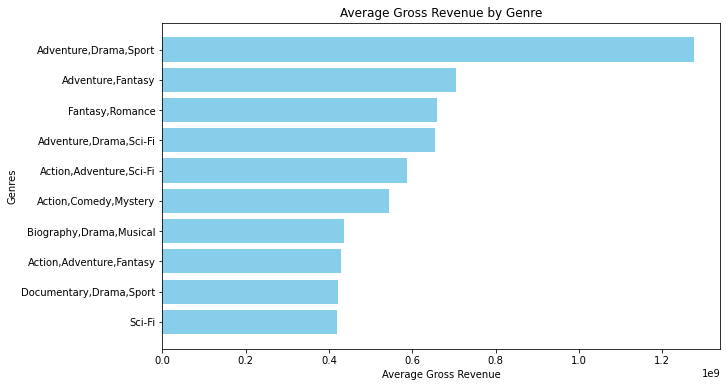

In [83]:
# Calculate average gross revenue by genre
genre_avg_gross = final_data.groupby('genres')['total_gross'].mean().sort_values(ascending=False)

# Select the top genres (you can choose the number of top genres you want to display)
top_genres = genre_avg_gross.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_genres.index, top_genres.values, color='skyblue')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Genres')
plt.title('Average Gross Revenue by Genre')
plt.gca().invert_yaxis()  # Reverse the order to display the highest grossing genre at the top
plt.show()


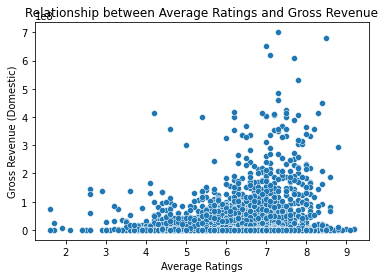

Correlation between Number of Votes and Gross Revenue: 0.6647286469503061


In [80]:
# Here you run your code to model the data
# Visualize the relationship between average ratings and gross revenue
sns.scatterplot(data=final_data, x='averagerating', y='domestic_gross')
plt.title("Relationship between Average Ratings and Gross Revenue")
plt.xlabel("Average Ratings")
plt.ylabel("Gross Revenue (Domestic)")
plt.show()

# Calculate the correlation between number of votes and gross revenue
correlation = final_data['numvotes'].corr(final_data['domestic_gross'])
print("Correlation between Number of Votes and Gross Revenue:", correlation)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***